# Predicting Video Game Success

## Table of content

1. [Introduction](#introduction)
2. [Objectives](#objectives)
3. [Data Import and Initial Overview](#data-import-and-initial-overview)
   - [Correct the Uppercase Letters, Count the Missing Values, and Count the Duplicates](#correct-the-uppercase-letters-count-the-missing-values-and-count-the-duplicates)
   - [Data Imputation](#data-imputation)
4. [Data Analysis](#data-analysis)
   - [Categorize Releases by Year](#categorize-releases-by-year)
   - [Sales Variability by Year](#sales-variability-by-year)
   - [Analysis of Results](#analysis-of-results)
5. [Diagrams](#diagrams)
   - [Box Plots](#box-plots)
   - [Correlation Between Sales and Reviews](#correlation-between-sales-and-reviews)
   - [Distribution of Sales by Genre](#distribution-of-sales-by-genre)
   - [Users by Region](#users-by-region)
6. [Japanese Market](#japanese-market)
   - [Top Consoles](#top-consoles)
   - [Video Game Sales by Genre](#video-game-sales-by-genre)
   - [Sales by ESRB Ratings](#sales-by-esrb-ratings)
7. [North American Market](#north-american-market)
   - [Top Consoles](#top-consoles-1)
   - [Sales by Video Game](#sales-by-video-game)
   - [Sales by ESRB Ratings Genre](#sales-by-esrb-ratings-genre)
8. [European Market](#european-market)
   - [Top Consoles](#top-consoles-2)
   - [Sales by Video Game Genre](#sales-by-video-game-genre)
   - [Sales by ESRB Ratings](#sales-by-esrb-ratings)
9. [Hypothesis Testing](#hypothesis-testing)
   - [Null Hypothesis Testing](#null-hypothesis-testing)
   - [Alternative Hypothesis](#alternative-hypothesis)
10. [Conclusions](#conclusions)

## Introduction

In order to find trends that influence a game's performance, this project will examine video game sales data until December 2016. The objective is to estimate possible hits for 2017 and enhance advertising campaigns by comprehending these trends. Game names, platforms, release years, genres, sales in various territories, user and reviewer ratings, and ESRB ratings are all included in the collection. In order to create data-driven marketing decisions, the study will concentrate on finding patterns in platform popularity, user preferences, and sales performance.

## Objectives

* Clean and prepare the dataset for analysis, addressing missing values and calculating total sales.
* Analyze sales trends, platform popularity, and genre performance to identify profitable opportunities.
* Examine regional preferences and test hypotheses on user ratings and genre differences.

## Data Import and Initial Overview

In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing libraries
import pandas as pd        
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sns       
from scipy import stats as st  

In [5]:
df = pd.read_csv("games.csv")
df.info()
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08 

The dataset contains information on video games, including their name, platform, release year, genre, sales in different regions (NA, EU, JP, Other), critic and user scores, and ESRB ratings. It includes 16,715 entries and 11 columns. Some columns have missing values, notably User_Score, Critic_Score, and Rating, with a significant amount of missing data in these fields. The dataset includes numerical data for sales and scores, as well as categorical data for game names, platforms, genres, and ratings. The next steps involve addressing missing values, adjusting data types, and analyzing patterns related to sales, ratings, and platforms.

### Correct the uppercase letters, count the missing values, and count the duplicates.

In [6]:
# Correct the column names to lowercase
df.columns = df.columns.str.lower()

# Count missing values
null_values = df.isnull().sum()

# Count total duplicates
total_duplicates = df.duplicated().sum()

# Display results
print("Total number of duplicate rows:", total_duplicates)
print()
print('Number of null values:')
print(null_values)

Total number of duplicate rows: 0

Number of null values:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


### Data imputation

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'].replace('tbd', np.nan), errors='coerce')

In the user_score column, we have a value of "tbd," which we replace with NaN to convert the column from object to float, as its values are decimal numbers.

In [8]:
# Replace null values in specific columns
df['name'].fillna('Unknown', inplace=True)  # Replace with 'Unknown'
df['year_of_release'].fillna(df['year_of_release'].median(), inplace=True)  # Fill with median
df['genre'].fillna('Other', inplace=True)  # Replace with 'Other'
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)  # Fill with median
df['user_score'].fillna(df['user_score'].median(), inplace=True)  # Fill with median
df['rating'].fillna('RP', inplace=True)  # Replace with 'RP' (Rating Pending)

# Verify there are no null values left
print("Number of null values after cleaning:")
print(df.isnull().sum())

Number of null values after cleaning:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\1632314354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)  # Replace with 'Unknown'
C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\1632314354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves


The missing values such as "name" and "genre" were replaced and not left blank, as this would not affect the results for this exercise. On the other hand, the other values were replaced with numerical values because the large number of blank entries could impact the results and decision-making. Therefore, methods like the mean and median were used to replace them.

## Data analysis

### Categorize releases by year

In [9]:
years = df['year_of_release']
print('Year of first release:', years.min())  # first release year
print('Year of last release:', years.max())   # last release year

Year of first release: 1980.0
Year of last release: 2016.0


In [10]:
# Define time periods
def period_time(year):
    if year < 1990:
        return '80s decade'
    elif year < 2000:
        return '90s decade'
    elif year < 2010:
        return '2000s decade'
    elif year < 2020:
        return '2010s decade'
    else:
        return '2020s or later decade'

# Apply the function to the 'year_of_release' column
df['period'] = df['year_of_release'].apply(period_time)

# Display the new column
print(df['period'].head())
period_counts = df['period'].value_counts()
print()
print(period_counts)

0    2000s decade
1      80s decade
2    2000s decade
3    2000s decade
4      90s decade
Name: period, dtype: object

period
2000s decade    9462
2010s decade    5277
90s decade      1771
80s decade       205
Name: count, dtype: int64


C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\1418351765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=period_counts.index, y=period_counts.values, palette="viridis")


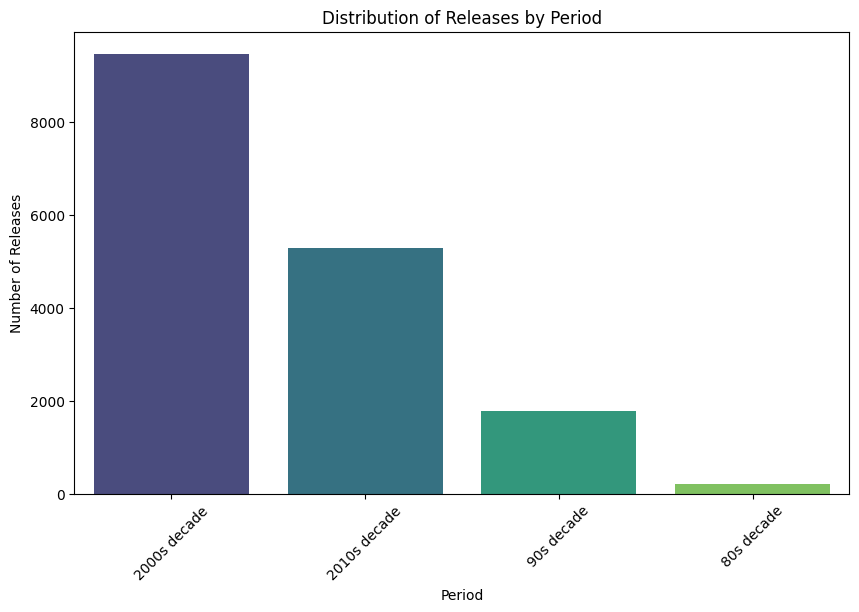

In [11]:
# Create a distribution chart by decades, from the highest to the lowest number of releases respectively.
plt.figure(figsize=(10, 6))
sns.barplot(x=period_counts.index, y=period_counts.values, palette="viridis")
plt.xlabel('Period')
plt.ylabel('Number of Releases')
plt.title('Distribution of Releases by Period')
plt.xticks(rotation=45)
plt.show()


Due to the technological advancements of the platforms, and considering that we need to make predictions for near-future trends, we will work with data from 2010 onwards.

In [13]:
# We obtain the data from 2010
df_2010 = df[df['period'] == '2010s decade']
print(df_2010.head())

                              name platform  year_of_release         genre  \
14              Kinect Adventures!     X360           2010.0          Misc   
16              Grand Theft Auto V      PS3           2013.0        Action   
23              Grand Theft Auto V     X360           2013.0        Action   
27     Pokemon Black/Pokemon White       DS           2010.0  Role-Playing   
29  Call of Duty: Modern Warfare 3     X360           2011.0       Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14     15.00      4.89      0.24         1.69          61.0         6.3   
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
27      5.51      3.17      5.65         0.80          71.0         7.5   
29      9.04      4.24      0.13         1.32          88.0         3.4   

   rating        period  
14      E  2010s decade  
16      M  2010s decade  
23

### Sales variability by year

In [14]:
# Identifying all the platforms we have
print(df_2010['platform'].unique())

['X360' 'PS3' 'DS' 'PS4' '3DS' 'Wii' 'XOne' 'WiiU' 'PC' 'PSP' 'PSV' 'PS2']


In [15]:
# Calculate total sales by platform
total_sales = df_2010.groupby(['platform'])[['jp_sales', 'na_sales', 'eu_sales']].sum()
total_sales['total_sales'] = total_sales.sum(axis=1)  # Total sales by platform
total_sales = total_sales.sort_values(by='total_sales', ascending=False)

# Get the platforms with the highest total sales
top_platforms = total_sales.head(5).index.tolist()  # Choose the top 5 platforms

# Filter the original DataFrame by the platforms in top_platforms
top_platform_data = total_sales.loc[top_platforms]

print(top_platform_data.head())

          jp_sales  na_sales  eu_sales  total_sales
platform                                           
X360          5.46    334.18    163.41       503.05
PS3          59.26    229.25    213.60       502.11
PS4          15.96    108.74    141.09       265.79
3DS         100.62     82.65     61.27       244.54
Wii          17.75    121.20     65.91       204.86


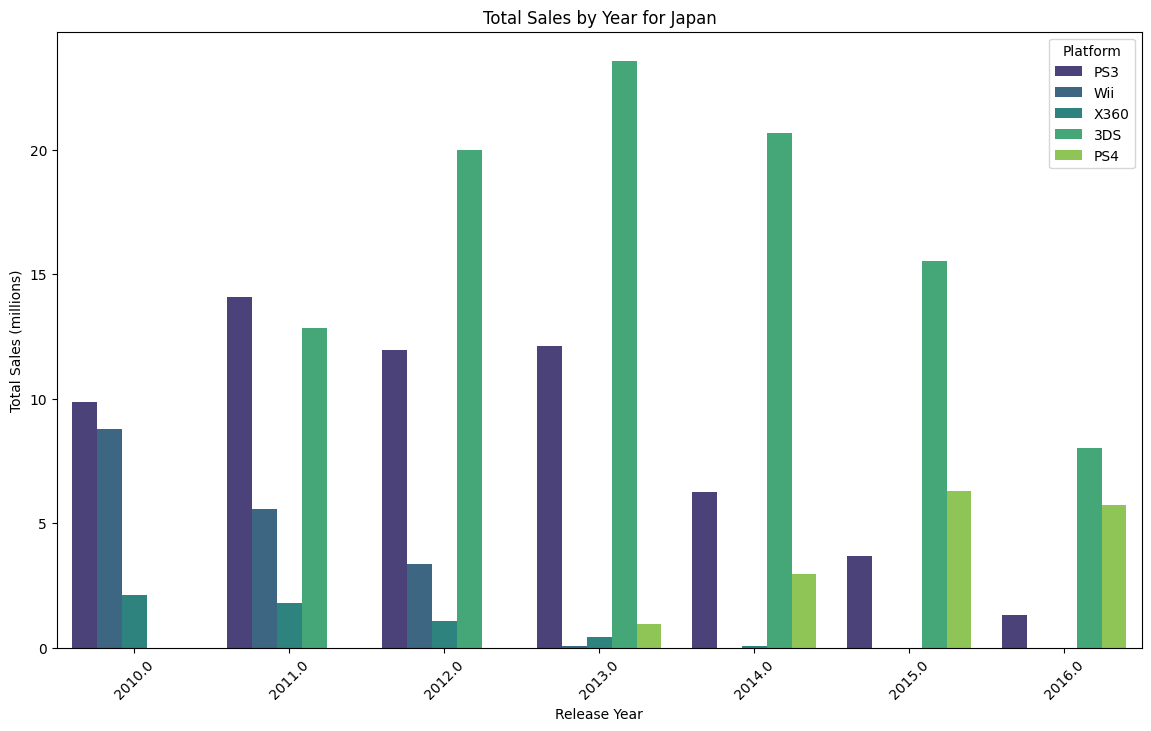

In [16]:
# Calculate total sales by year and platform
sales_by_year_platform = df_2010.groupby(['year_of_release', 'platform'])[['jp_sales', 'na_sales', 'eu_sales']].sum().reset_index()

# Filter only the platforms in top_platforms
sales_by_year_platform = sales_by_year_platform[sales_by_year_platform['platform'].isin(top_platforms)]

# Build a bar chart of sales by year for the selected platforms
plt.figure(figsize=(14, 8))
sns.barplot(x='year_of_release', y='jp_sales', hue='platform', data=sales_by_year_platform, palette='viridis')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Year for Japan')
plt.xticks(rotation=45)
plt.legend(title='Platform', loc='upper right')
plt.show()

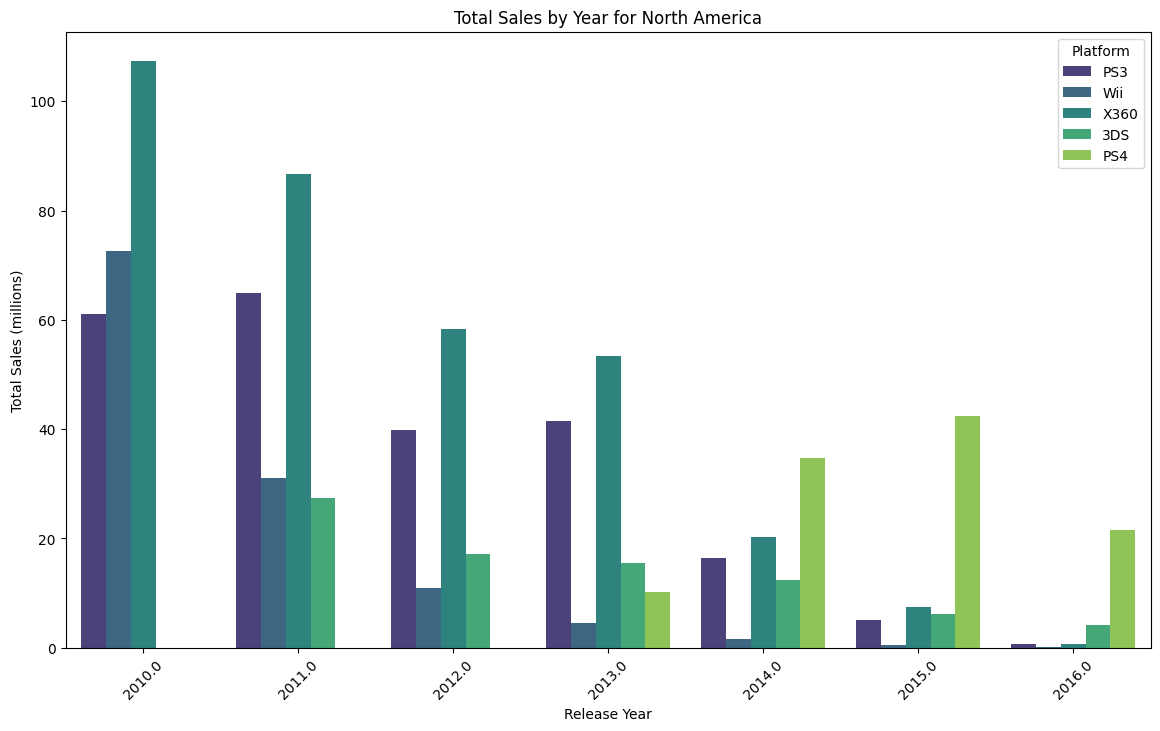

In [17]:
# Build a bar chart of sales by year for the selected platforms
plt.figure(figsize=(14, 8))
sns.barplot(x='year_of_release', y='na_sales', hue='platform', data=sales_by_year_platform, palette='viridis')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Year for North America')
plt.xticks(rotation=45)
plt.legend(title='Platform', loc='upper right')
plt.show()

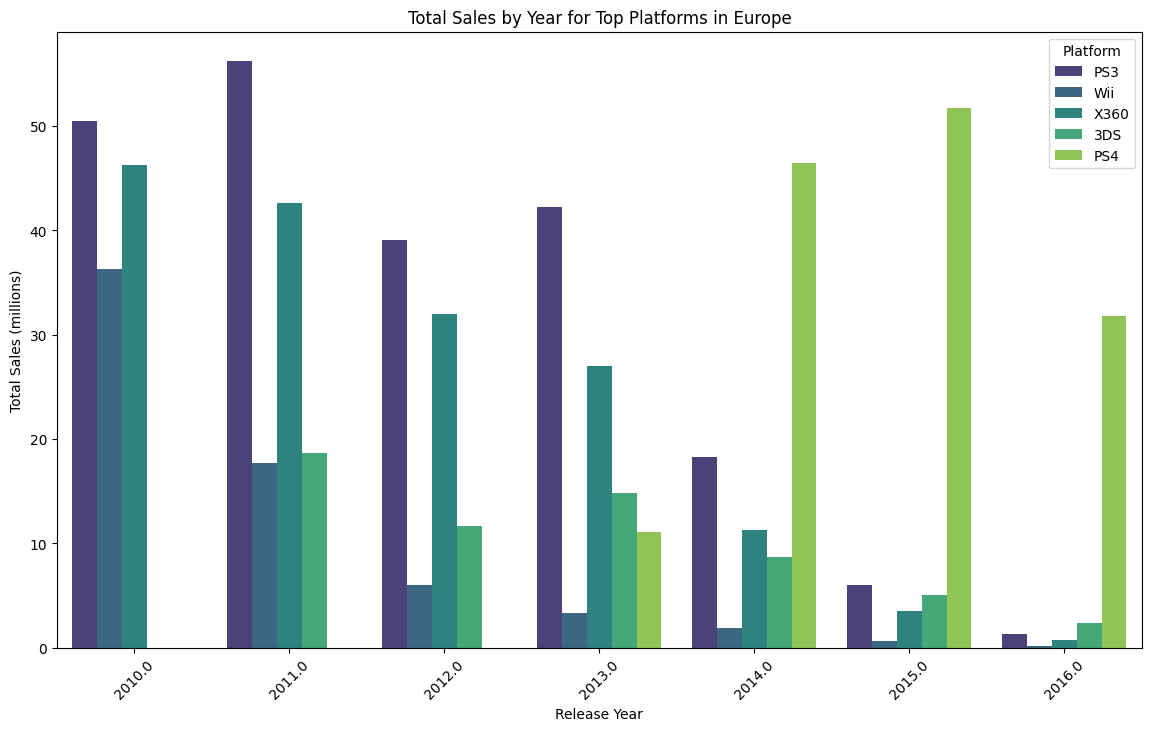

In [18]:
# Build a bar chart of sales by year for the selected platforms
plt.figure(figsize=(14, 8))
sns.barplot(x='year_of_release', y='eu_sales', hue='platform', data=sales_by_year_platform, palette='viridis')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Year for Top Platforms in Europe')
plt.xticks(rotation=45)
plt.legend(title='Platform', loc='upper right')
plt.show()

### Analysis of results

We can identify that at the end of the 20th century and the beginning of the 21st century, there was a noticeable trend towards Nintendo handheld consoles, as this format dominated the market. Additionally, sales in North America tend to be higher than those in Europe or Japan. Before the new decade began, a shift in the trend can be observed with the arrival of new console models, such as the Wii, PS, and Xbox, which quickly became the favorites, leaving handheld consoles behind. However, the Wii consoles didn’t remain among the best-sellers for long, and the current trend is between Xbox and PlayStation.

## Diagrams

### Box plots

C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\4085947358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='na_sales', data=sales_by_year_platform, palette='Set3')


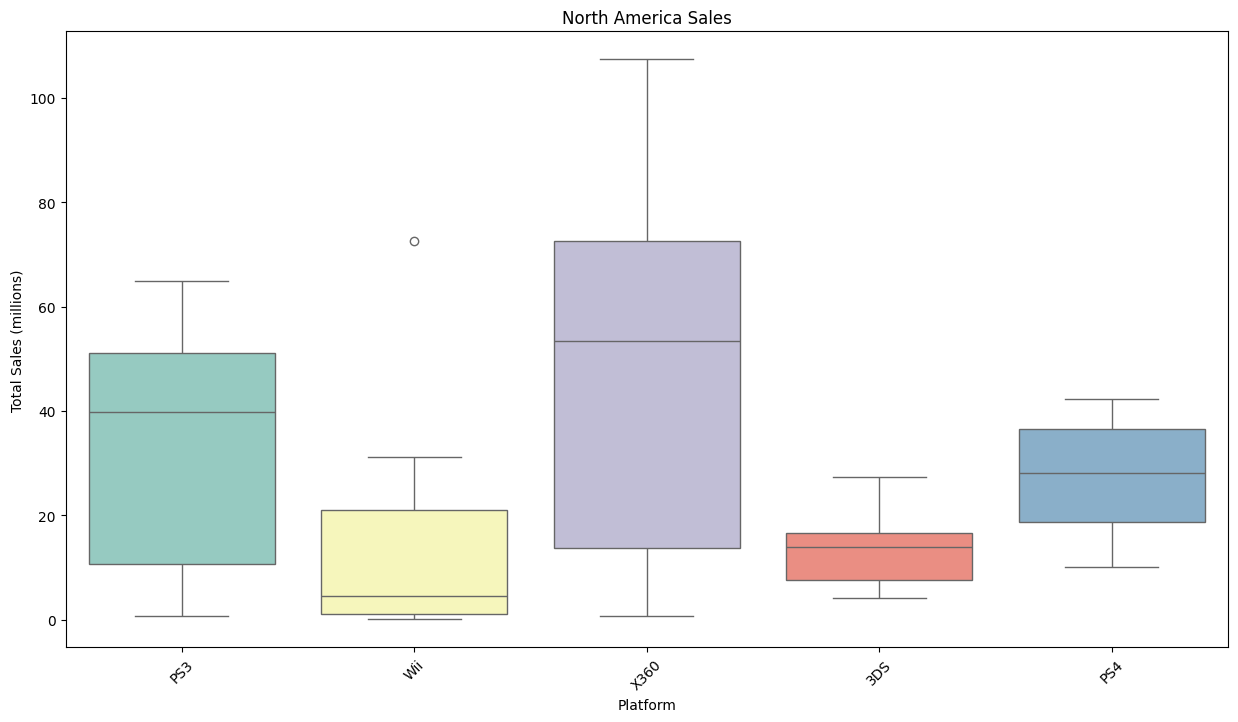

In [19]:
# Create a box plot for global sales of all games, broken down by platform
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='na_sales', data=sales_by_year_platform, palette='Set3')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('North America Sales')
plt.xticks(rotation=45)
plt.show()


In North America, we can observe that Xbox 360 games not only have the highest sales but also the greatest variability, meaning that the forecast accuracy for future sales would be lower compared to other consoles. For example, PS4 games have lower sales but less variability. This behavior could be attributed to exclusive games available on these consoles, as Xbox might have had more exclusive titles compared to PS4. Another point to highlight is the Wii consoles, where outliers could be explained by the success of certain games, which boosted popularity, but not to the levels of PS or Xbox.

C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\2799518883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='jp_sales', data=sales_by_year_platform, palette='Set3')


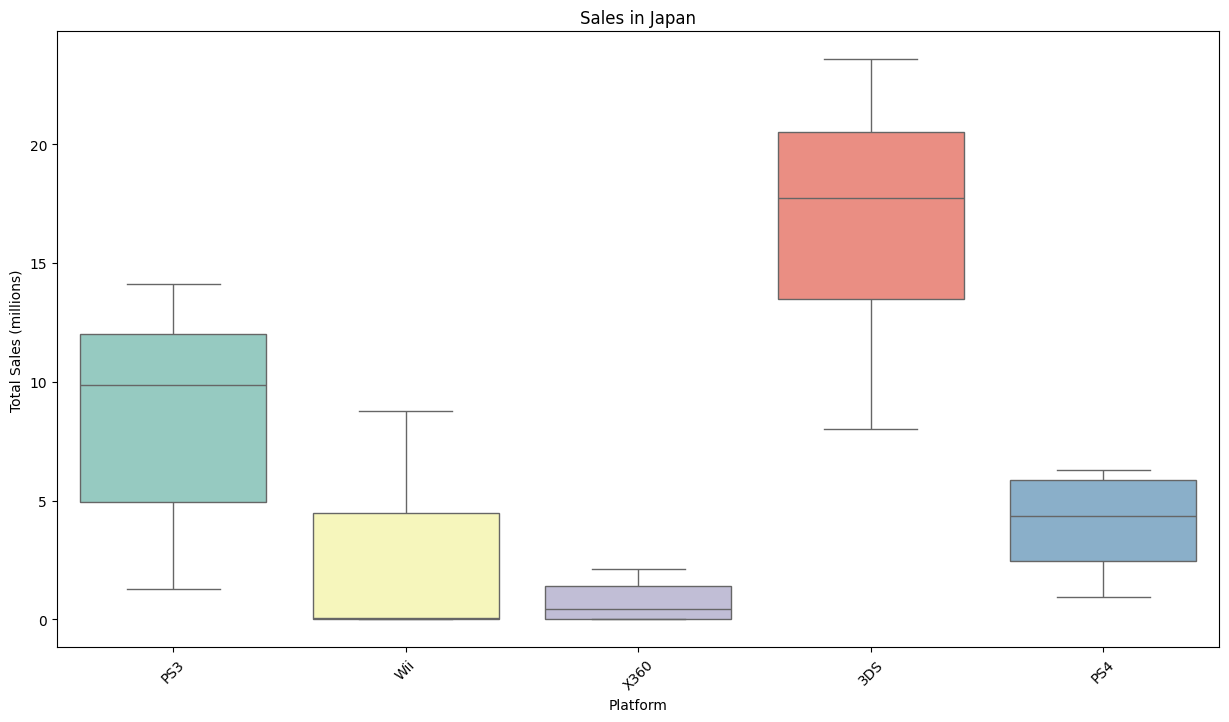

In [20]:
# Create a box plot for global sales of all games, broken down by platform
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='jp_sales', data=sales_by_year_platform, palette='Set3')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Sales in Japan')
plt.xticks(rotation=45)
plt.show()

For Japan, the most popular games are from portable consoles like the 3DS and the Wii, which is an interactive console. However, we must also note that the time periods analyzed correspond to a generational shift. The PS4 shows less variability than the PS3, as it is a newer console and has not been in the market as long as the PS3. Lastly, the Xbox 360 has sales above the median with lower variability and sales in the Japanese market.

C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\1074398332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='eu_sales', data=sales_by_year_platform, palette='Set3')


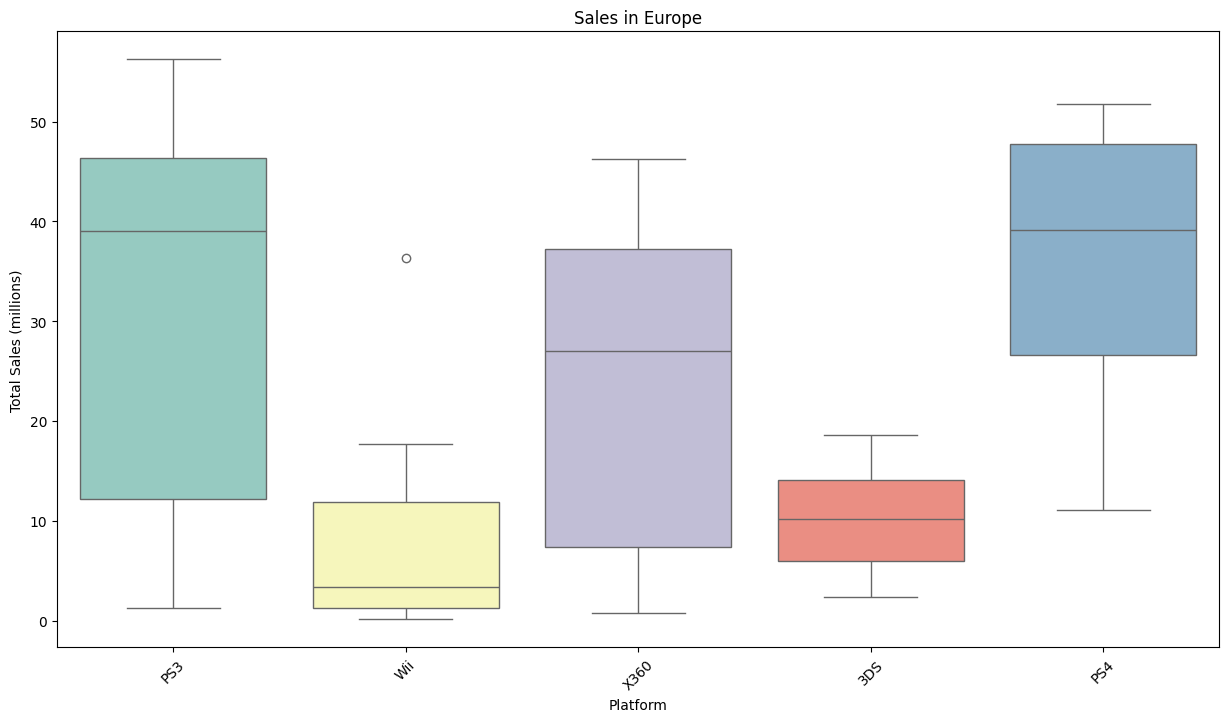

In [21]:
# Create a box plot for the global sales of all games, broken down by platform
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='eu_sales', data=sales_by_year_platform, palette='Set3')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Sales in Europe')
plt.xticks(rotation=45)
plt.show()


In Europe, the clear dominant platform is PS. Unlike in Japan, portable or interactive consoles are not popular in the European market. Additionally, although Xbox is successful, it is not the favorite as it is in the North American market. It is important to note that in this market, Xbox enjoys greater stability in sales compared to its rivals. Furthermore, new PS4 releases tend to have slightly higher acceptance than those of Xbox, as they have slightly higher sales above the median compared to Xbox.

### Correlation between sales and reviews

C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\3301312379.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ps4 = df_2010[df['platform'] == 'PS4']


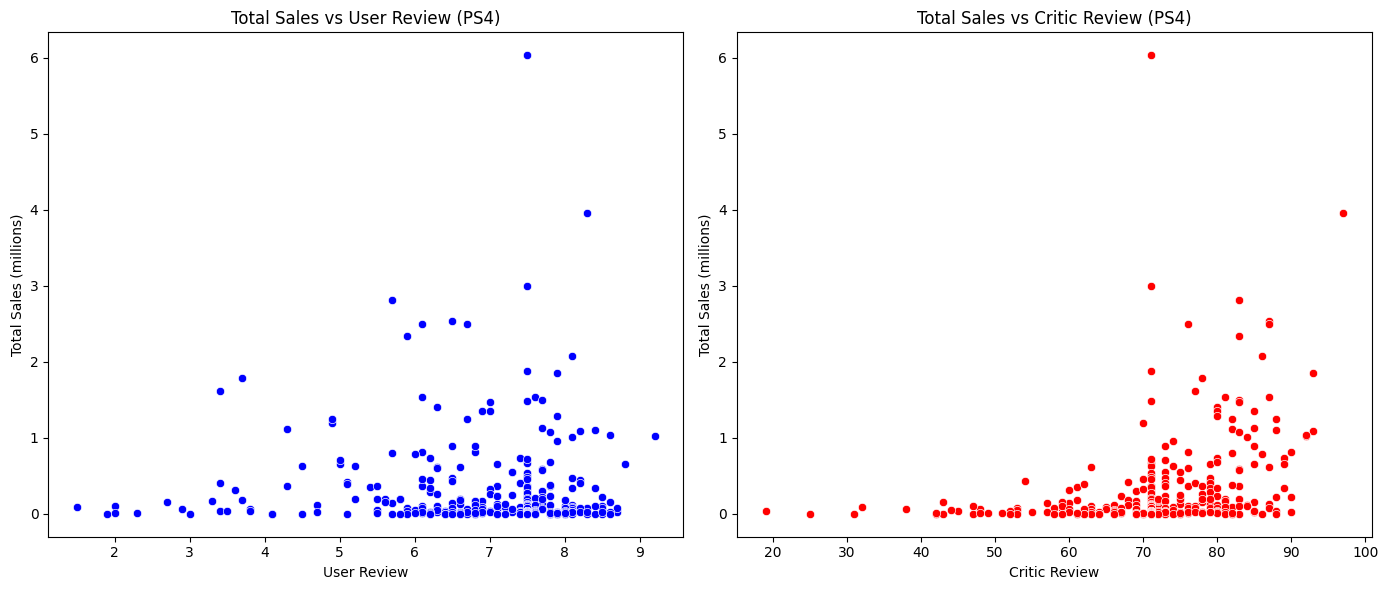

In [22]:
# Filter data for the PS4 platform
df_ps4 = df_2010[df['platform'] == 'PS4']

# Create scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for user_score
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='na_sales', data=df_ps4, color='blue')
plt.xlabel('User Review')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales vs User Review (PS4)')

# Scatter plot for critic_score
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='na_sales', data=df_ps4, color='red')
plt.xlabel('Critic Review')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales vs Critic Review (PS4)')

plt.tight_layout()
plt.show()

We can observe a positive correlation between sales and good reviews from both users and professionals. However, it is noticeable that professional reviews seem to have a stronger influence on video game sales compared to user reviews.

## Distribution of sales by genre

C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\529957675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010['total_sales'] = df_2010[['jp_sales', 'na_sales', 'eu_sales']].sum(axis=1)
C:\Users\Felip\AppData\Local\Temp\ipykernel_28588\529957675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values, palette='viridis')


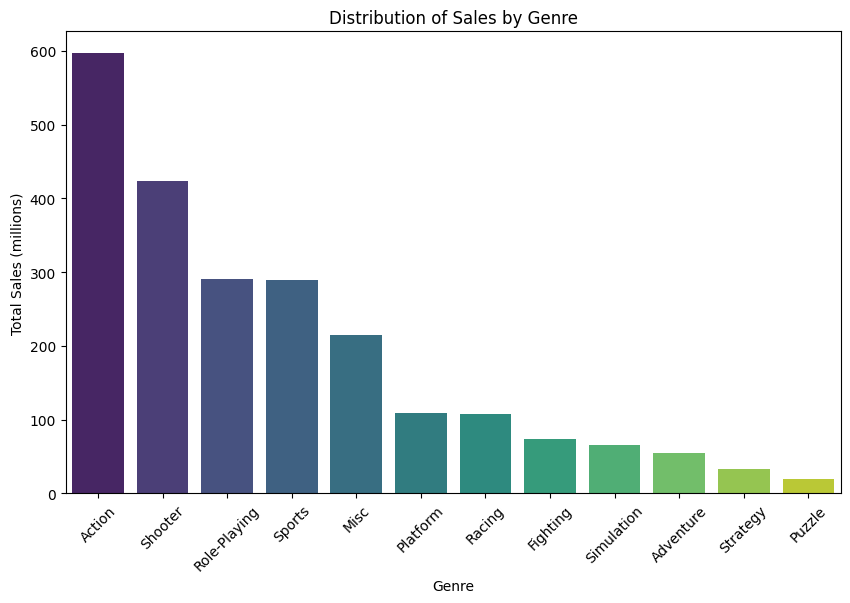

genre
Action          596.47
Shooter         422.96
Role-Playing    291.07
Sports          289.16
Misc            214.18
Platform        109.01
Racing          107.54
Fighting         73.28
Simulation       66.08
Adventure        55.39
Strategy         32.54
Puzzle           19.08
Name: total_sales, dtype: float64


In [23]:
# Calculate total sales
df_2010['total_sales'] = df_2010[['jp_sales', 'na_sales', 'eu_sales']].sum(axis=1)

# Group by genre and calculate total sales
sales_by_genre = df_2010.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualize the distribution of sales by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Distribution of Sales by Genre')
plt.xticks(rotation=45)
plt.show()

# Show descriptive statistics
print(sales_by_genre)

During the 2010s, the clear dominant genre was action, unlike what we saw earlier when interaction and simulation consoles like the Wii dominated the market with simulation and adventure genres. We can infer that the two main genres are related, as there are action games that also feature shooter elements. However, role-playing and sports games are not far behind in terms of sales, so they require more attention compared to genres like strategy and puzzles.

## Users by region

### Japanese market

#### Top consoles

In [24]:
# Calculate total sales in Japan by platform
sales_jp = df_2010.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Get the platforms with the highest total sales
top_platforms_jp = sales_jp.head(5)

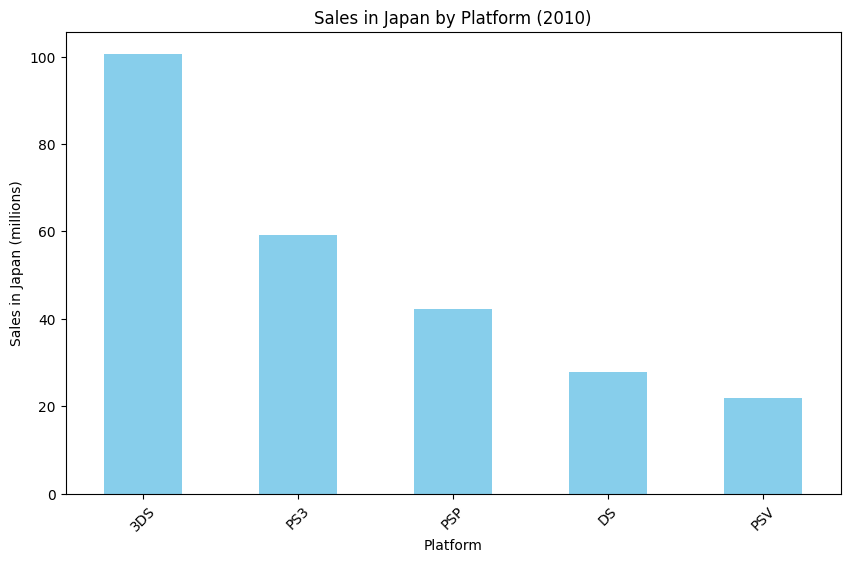

In [25]:
# Create the bar chart
plt.figure(figsize=(10, 6))
top_platforms_jp.plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Sales in Japan (millions)')
plt.title('Sales in Japan by Platform (2010)')
plt.xticks(rotation=45)
plt.show()

#### Video game sales by genre

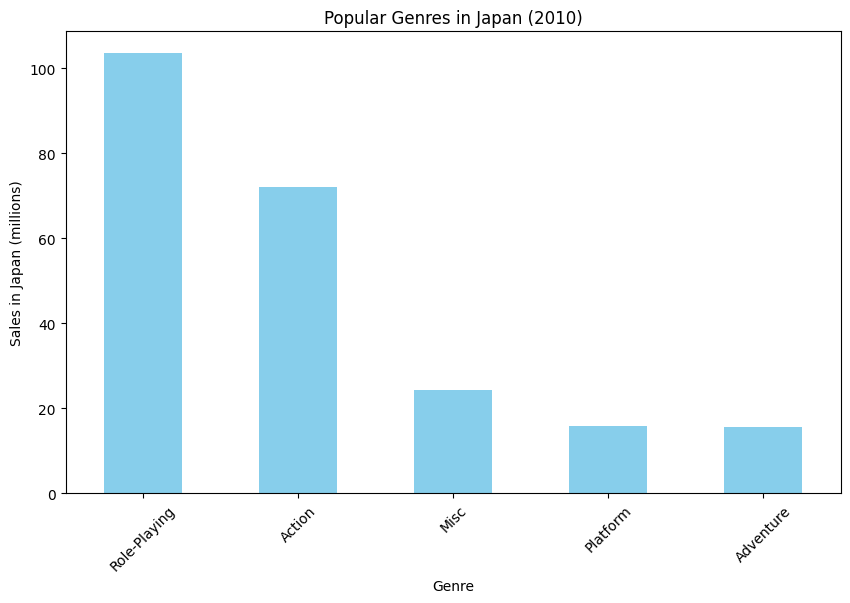

In [26]:
# Calculate total sales in Japan by genre
genre_jp = df_2010.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Get the top genres with the highest total sales
top_genre_jp = genre_jp.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_genre_jp.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Sales in Japan (millions)')
plt.title('Popular Genres in Japan (2010)')
plt.xticks(rotation=45)
plt.show()

#### Sales by ESRB ratings

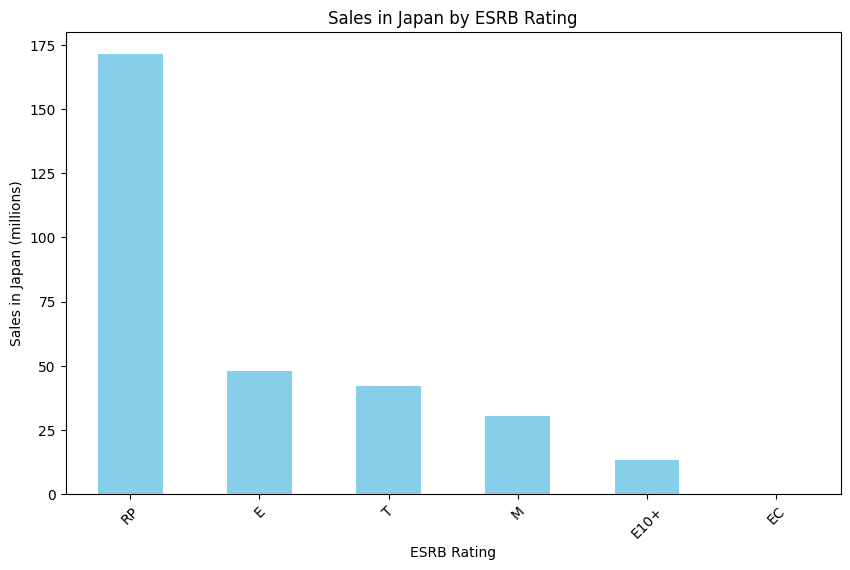

Correlation between ESRB rating and sales in Japan: 0.07


In [27]:
# ESRB ratings
# Filter the data to include only games with sales information in Japan
df_japan = df_2010.dropna(subset=['jp_sales', 'rating'])

# Group the data by ESRB rating and calculate the total sales in Japan
esrb_sales_jp = df_japan.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
esrb_sales_jp.plot(kind='bar', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales in Japan (millions)')
plt.title('Sales in Japan by ESRB Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation between ESRB ratings and sales
# First, convert the ESRB ratings to numeric values
rating_map = {'E': 1, 'E10+': 2, 'T': 3, 'M': 4, 'AO': 5, 'RP': 6}
df_japan['rating_numeric'] = df_japan['rating'].map(rating_map)

# Calculate the correlation
correlation = df_japan['rating_numeric'].corr(df_japan['jp_sales'])
print(f'Correlation between ESRB rating and sales in Japan: {correlation:.2f}')

### North American market

#### Top consoles

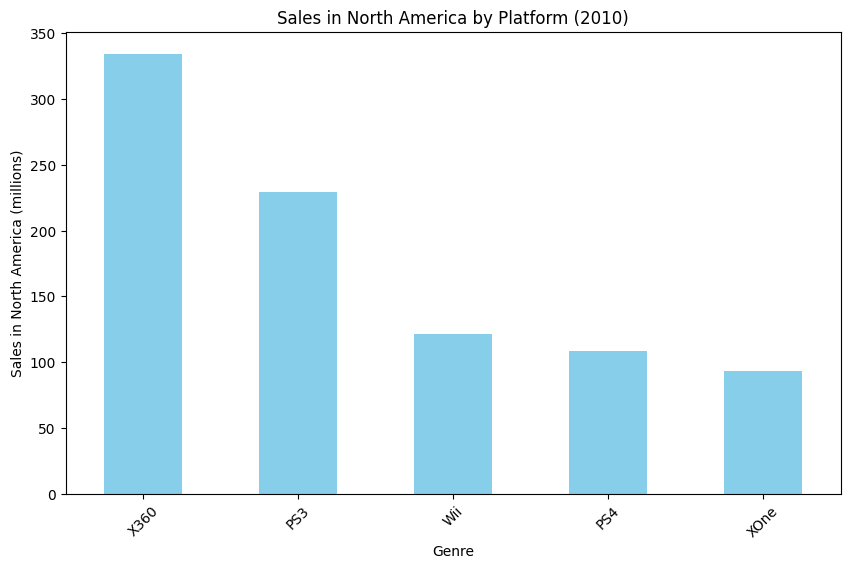

In [28]:
# Calculate total sales in North America by platform
sales_na = df_2010.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

# Get the platforms with the highest total sales
top_platforms_na = sales_na.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_platforms_na.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Sales in North America (millions)')
plt.title('Sales in North America by Platform (2010)')
plt.xticks(rotation=45)
plt.show()

#### Sales by video game genre

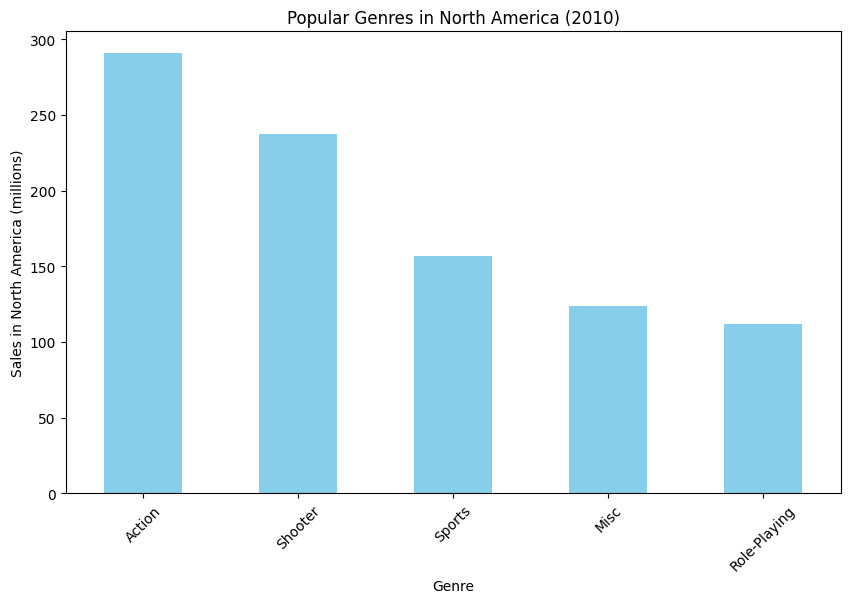

In [29]:
# Calculate total sales in North America by genre
genre_na = df_2010.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

# Get the genres with the highest total sales
top_genre_na = genre_na.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_genre_na.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Sales in North America (millions)')
plt.title('Popular Genres in North America (2010)')
plt.xticks(rotation=45)
plt.show()

#### Sales by ESRB Ratings

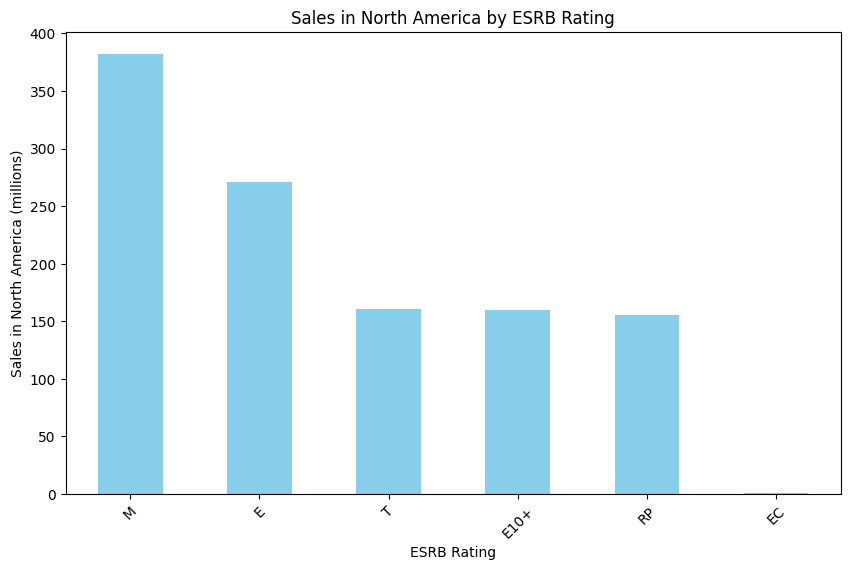

Correlation between ESRB rating and sales in North America: -0.14


In [30]:
# ESRB Ratings
# Filter data to include only games with sales information in North America
df_na = df_2010.dropna(subset=['na_sales', 'rating'])

# Group data by ESRB rating and calculate total sales in North America
esrb_sales_na = df_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
esrb_sales_na.plot(kind='bar', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales in North America (millions)')
plt.title('Sales in North America by ESRB Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation between ESRB ratings and sales
# First, convert ESRB ratings to numeric values
rating_map = {'E': 1, 'E10+': 2, 'T': 3, 'M': 4, 'AO': 5, 'RP': 6}
df_na['rating_numeric'] = df_na['rating'].map(rating_map)

# Calculate the correlation
correlation = df_na['rating_numeric'].corr(df_na['na_sales'])
print(f'Correlation between ESRB rating and sales in North America: {correlation:.2f}')

### European Market

#### Top consoles

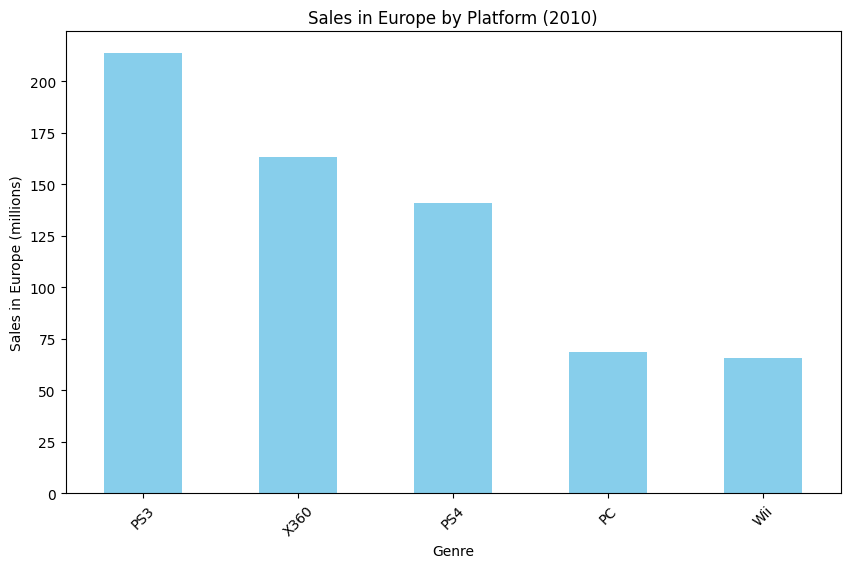

In [31]:
# Calculate total sales in North America by platform
sales_eu = df_2010.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

# Get the platforms with the highest total sales
top_platforms_eu = sales_eu.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_platforms_eu.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Sales in Europe (millions)')
plt.title('Sales in Europe by Platform (2010)')
plt.xticks(rotation=45)
plt.show()

#### Sales by Video Game Genre

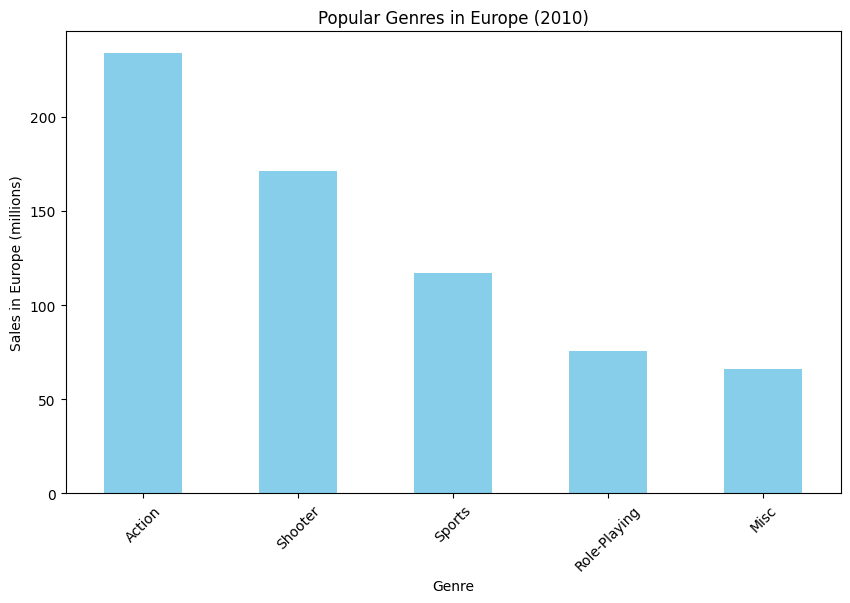

In [32]:
# Calculate total sales in North America by genre
genre_eu = df_2010.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

# Get the genres with the highest total sales
top_genre_eu = genre_eu.head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_genre_eu.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Sales in Europe (millions)')
plt.title('Popular Genres in Europe (2010)')
plt.xticks(rotation=45)
plt.show()

#### Sales by ESRB ratings

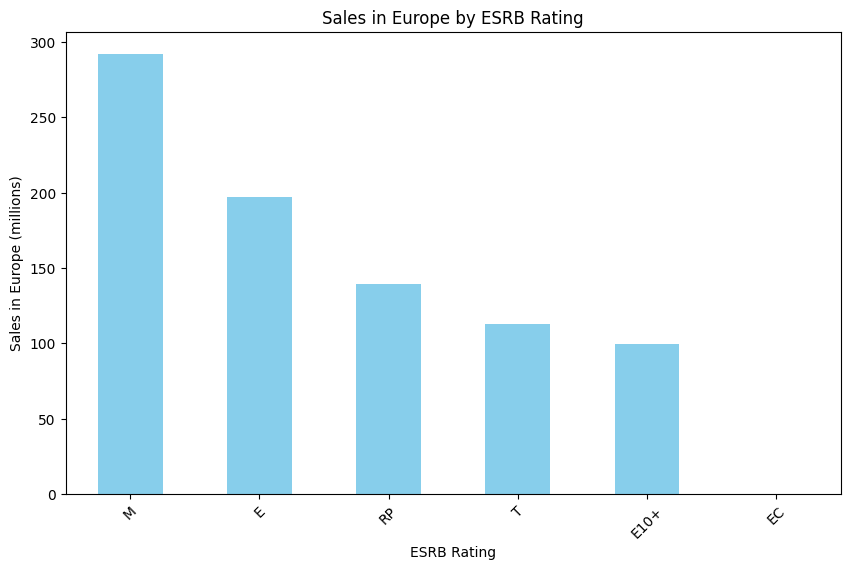

Correlation between ESRB rating and sales in Europe: -0.14


In [33]:
# ESRB ratings
# Filter the data to include only games with sales information in Europe
df_eu = df_2010.dropna(subset=['eu_sales', 'rating'])

# Group the data by ESRB rating and calculate the total sales in Europe
esrb_sales_eu = df_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
esrb_sales_eu.plot(kind='bar', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales in Europe (millions)')
plt.title('Sales in Europe by ESRB Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation between ESRB ratings and sales
# First, convert ESRB ratings to numerical values
rating_map = {'E': 1, 'E10+': 2, 'T': 3, 'M': 4, 'AO': 5, 'RP': 6}
df_eu['rating_numeric'] = df_eu['rating'].map(rating_map)

# Calculate the correlation
correlation = df_na['rating_numeric'].corr(df_na['na_sales'])
print(f'Correlation between ESRB rating and sales in Europe: {correlation:.2f}')

The analyses have provided revealing data, such as the significant difference between the Japanese market and the North American and European markets, where Nintendo and role-playing games are the clear leaders. Another important result to consider is that video games rated for adults are a success in Europe and North America, in contrast to Japan. Therefore, future plans should be handled with caution, as the audience in Japan does not share the same interests as those in Europe or North America.

## Hypothesis testing

### Null hypothesis testing
The average user ratings for the Xbox One and PC platforms are the same.

In [34]:
xbox_one_data = df_2010[(df_2010['platform'] == 'XOne') & (df_2010['user_score'].notna())]
pc_data = df_2010[(df_2010['platform'] == 'PC') & (df_2010['user_score'].notna())]

# Get user ratings
xbox_one_user_scores = xbox_one_data['user_score'].astype(float)
pc_user_scores = pc_data['user_score'].astype(float)

# Perform t-test for two independent samples
t_stat, p_value = st.ttest_ind(xbox_one_user_scores, pc_user_scores)

# Display the results
print(f't-statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.2f}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: the average user ratings for Xbox One and PC are different.")
else:
    print("We cannot reject the null hypothesis: the average user ratings for Xbox One and PC are the same.")

t-statistic: 0.42
p-value: 0.67
We cannot reject the null hypothesis: the average user ratings for Xbox One and PC are the same.


#### Alternative hypothesis

In [35]:
# Filter data for Action and Sports genres
accion_data = df_2010[df_2010['genre'] == 'Action']
deportes_data = df_2010[df_2010['genre'] == 'Sports']

# Filter non-null data
accion_user_scores = accion_data['user_score'].notna()
deportes_user_scores = deportes_data['user_score'].notna()

# Select only valid data
accion_user_scores = accion_data[accion_user_scores]['user_score']
deportes_user_scores = deportes_data[deportes_user_scores]['user_score']

# Perform the t-test for independent samples
t_stat, p_value = st.ttest_ind(accion_user_scores, deportes_user_scores)

# Display results
print(f't-statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.2f}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the alternative hypothesis: the average user ratings for Action and Sports are different.")
else:
    print("We cannot reject the alternative hypothesis: the average user ratings for Action and Sports are the same.")

t-statistic: 8.65
p-value: 0.00
Reject the alternative hypothesis: the average user ratings for Action and Sports are different.


## Conclusions


1. **Xbox One vs. PC Ratings:**
   - There is no significant difference in the average user ratings between Xbox One and PC. Players seem to have similar preferences for both platforms.

2. **Action vs. Sports Genres Ratings:**
   - There is a significant difference in the average user ratings between the Action and Sports genres. Users rate these genres differently.

3. **Market Preferences:**
   - **Japan:** Nintendo games and role-playing games (RPGs) dominate the market. Players prefer immersive and family-friendly experiences.
   - **North America and Europe:** Mature-rated (M-rated) games are more popular, especially on platforms like PlayStation and Xbox.

4. **Regional Differences:**
   - Player preferences vary greatly between Japan and Western markets. Japan prefers more family-friendly games, while North America and Europe favor more mature content.

5. **Future Strategies:**
   - Companies should tailor their games and marketing strategies based on regional preferences. In Japan, the focus should be on family-friendly games, while in the rest of the world, especially North America and Europe, more mature games are likely to succeed.

6. **Importance of ESRB Ratings:**
   - Age ratings such as ESRB are an important factor in game selection. Mature-rated games are more popular in North America and Europe, while Japan prefers games with lower ratings.